# Exploratory Data Analysis of Bike Sharing Demand

### Analyzing and preprocessing data to identify patterns and create a model to predict the future demand

- *Importing the modules*

In [1]:
# Standard Imports
import warnings

# Third-party imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Specific imports
from statsmodels.graphics.tsaplots import  plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from sklearn.datasets import fetch_openml

warnings.filterwarnings("ignore")

- *Data Loading and Preparation*

In [2]:
# Load dataset directly from scikit-learn's database (using "datasets" module)
bike = fetch_openml("Bike_Sharing_Demand", version=2, as_frame=True)

# Extract dataframe directly from the returned dictionary (key "frame")
df = bike["frame"]

# Display Data
df

,season,year,month,hour,holiday,weekday,workingday,weather,temp,feel_temp,humidity,windspeed,count
0,spring,0,1,0,False,6,False,clear,9.84,14.395,0.81,0.0000,16
1,spring,0,1,1,False,6,False,clear,9.02,13.635,0.80,0.0000,40
2,spring,0,1,2,False,6,False,clear,9.02,13.635,0.80,0.0000,32
3,spring,0,1,3,False,6,False,clear,9.84,14.395,0.75,0.0000,13
4,spring,0,1,4,False,6,False,clear,9.84,14.395,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,spring,1,12,19,False,1,True,misty,10.66,12.880,0.60,11.0014,119
17375,spring,1,12,20,False,1,True,misty,10.66,12.880,0.60,11.0014,89
17376,spring,1,12,21,False,1,True,clear,10.66,12.880,0.60,11.0014,90
17377,spring,1,12,22,False,1,True,clear,10.66,13.635,0.56,8.9981,61


- *Initial exploration of data*

In [3]:
# Displaying info about the dataframe
print("\nDataset information:")
df.info()

# Displaying basic stats about the numerical features
print("\nBasic statistics:")
df.describe()


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      17379 non-null  category
 1   year        17379 non-null  int64   
 2   month       17379 non-null  int64   
 3   hour        17379 non-null  int64   
 4   holiday     17379 non-null  category
 5   weekday     17379 non-null  int64   
 6   workingday  17379 non-null  category
 7   weather     17379 non-null  category
 8   temp        17379 non-null  float64 
 9   feel_temp   17379 non-null  float64 
 10  humidity    17379 non-null  float64 
 11  windspeed   17379 non-null  float64 
 12  count       17379 non-null  int64   
dtypes: category(4), float64(4), int64(5)
memory usage: 1.3 MB

Basic statistics:


,year,month,hour,weekday,temp,feel_temp,humidity,windspeed,count
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,0.502561,6.537775,11.546752,3.003683,20.376474,23.788755,0.627229,12.736540,189.463088
std,0.500008,3.438776,6.914405,2.005771,7.894801,8.592511,0.192930,8.196795,181.387599
min,0.000000,1.000000,0.000000,0.000000,0.820000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.000000,6.000000,1.000000,13.940000,16.665000,0.480000,7.001500,40.000000
50%,1.000000,7.000000,12.000000,3.000000,20.500000,24.240000,0.630000,12.998000,142.000000
75%,1.000000,10.000000,18.000000,5.000000,27.060000,31.060000,0.780000,16.997900,281.000000
max,1.000000,12.000000,23.000000,6.000000,41.000000,50.000000,1.000000,56.996900,977.000000


- *Calculating the coefficient of variation (CV)*

The coefficient of variation (CV) is a statistical measure of dispersion that represents the ratio of the standard deviation to the mean. It is a unitless measure, often expressed as a percentage, that indicates the relative variability of a data set, making it useful for comparing the variability of different data sets with different units or scales.


In [4]:
# Target CV
print(f"CV = {181.38 / 189.46 * 100} %")

CV = 95.73524754565607 %


In [5]:
# Temperature CV
print(f"CV = {7.89 / 20.37 * 100} %")

CV = 38.73343151693667 %


In [6]:
# Windspeed CV
print(f"CV = {8.19 / 12.73 * 100} %")

CV = 64.3362136684996 %


- *Splitting the dataframe into features and target*

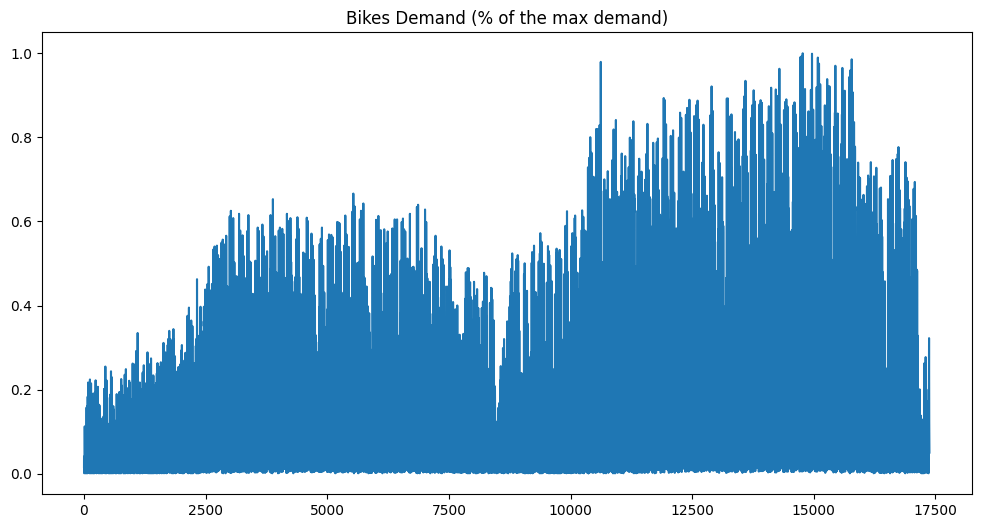

In [7]:
# Splitting data into target (y, dependent variable) and features (X, independent variables)

# Starting with the target...

# Why predict the fraction of maximum demand instead of the absolute number of bikes?
# - Normalizes the data → prevents very busy or empty days from distorting the model
# - Facilitates comparisons → 60% demand could be 180 bikes on a rainy day or 600 on a sunny day
# - Makes predictions more useful for planning → managers think in % of demand, not fixed numbers

# Target in absolute value and also scaled (0..1) to facilitate error interpretation
y_abs = df["count"].copy()
y = y_abs / y_abs.max()

# Plotting the normalized target
y.plot(figsize=(12, 6), title="Bikes Demand (% of the max demand)")
plt.show()

In [8]:
# Now the features
X = df.drop(columns=["count"]).copy()

# Analyze class balance
for feature in X.columns:
    print("-" * 30)
    print(feature)
    print("-" * 30)
    distribuicao_categoria = X[feature].value_counts().sort_index()
    print(distribuicao_categoria)

# Adjust sparse categories: heavy_rain -> rain
X["weather"] = X["weather"].astype(object).replace("heavy_rain", "rain").astype("category")

# Validate category adjustment
X["weather"].value_counts()

------------------------------
season
------------------------------
season
fall      4496
spring    4242
summer    4409
winter    4232
Name: count, dtype: int64
------------------------------
year
------------------------------
year
0    8645
1    8734
Name: count, dtype: int64
------------------------------
month
------------------------------
month
1     1429
2     1341
3     1473
4     1437
5     1488
6     1440
7     1488
8     1475
9     1437
10    1451
11    1437
12    1483
Name: count, dtype: int64
------------------------------
hour
------------------------------
hour
0     726
1     724
2     715
3     697
4     697
5     717
6     725
7     727
8     727
9     727
10    727
11    727
12    728
13    729
14    729
15    729
16    730
17    730
18    728
19    728
20    728
21    728
22    728
23    728
Name: count, dtype: int64
------------------------------
holiday
------------------------------
holiday
False    16879
True       500
Name: count, dtype: int64
----------------

weather
clear    11413
misty     4544
rain      1422
Name: count, dtype: int64

- *EDA (Exploratory Data Analysis)*

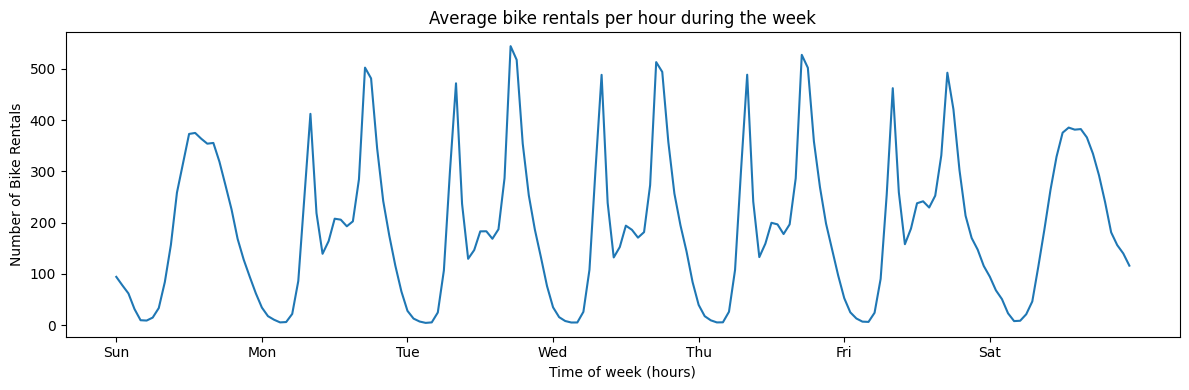

In [9]:
# Calculate average demand per hour during the week
average_week_demand = df.groupby(["weekday", "hour"])["count"].mean()

# Create figure and plot axis
fig, ax = plt.subplots(figsize=(12, 4))

# Plot series (line chart)
average_week_demand.plot(ax=ax)

# Plot settings (titles and axes)
ax.set(
    title="Average bike rentals per hour during the week",  # figure title
    xticks=[i * 24 for i in range(7)],  # reformatted x-axis values (single-index)
    xticklabels=["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"],  # x-axis labels
    xlabel="Time of week (hours)",  # x-axis title
    ylabel="Number of Bike Rentals",  # y-axis title
)

plt.tight_layout()

# Saving the image
plt.savefig(r"images\average_week_demand.png")

# Display plot
plt.show()

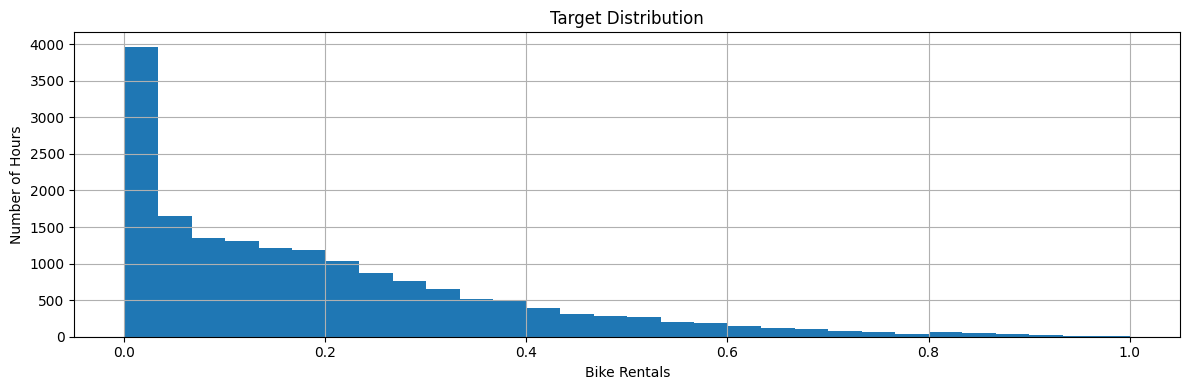

In [10]:
# Create figure and plot axis
fig, ax = plt.subplots(figsize=(12, 4))

# Plot data distribution (histogram)
y.hist(bins=30, ax=ax)

# Plot settings (titles and axes)
ax.set(
    title="Target Distribution",
    xlabel="Bike Rentals",
    ylabel="Number of Hours",
)

plt.tight_layout()

# Saving the image
plt.savefig(r"images\target_distribution.png")

# Display plot
plt.show()

- *Feature engineering*

In [11]:
# Create copies of the samples for feature engineering
X_fe = X.copy()
y_fe = y.copy()
df

,season,year,month,hour,holiday,weekday,workingday,weather,temp,feel_temp,humidity,windspeed,count
0,spring,0,1,0,False,6,False,clear,9.84,14.395,0.81,0.0000,16
1,spring,0,1,1,False,6,False,clear,9.02,13.635,0.80,0.0000,40
2,spring,0,1,2,False,6,False,clear,9.02,13.635,0.80,0.0000,32
3,spring,0,1,3,False,6,False,clear,9.84,14.395,0.75,0.0000,13
4,spring,0,1,4,False,6,False,clear,9.84,14.395,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,spring,1,12,19,False,1,True,misty,10.66,12.880,0.60,11.0014,119
17375,spring,1,12,20,False,1,True,misty,10.66,12.880,0.60,11.0014,89
17376,spring,1,12,21,False,1,True,clear,10.66,12.880,0.60,11.0014,90
17377,spring,1,12,22,False,1,True,clear,10.66,13.635,0.56,8.9981,61


- *Making the encoding of cyclical features (hour, weekday and month)*

In [12]:
# Encoding cyclical features for hour, weekday and month

# Time of day (24), day of week (7), month (12)
for col, period in [("hour", 24), ("weekday", 7), ("month", 12)]:
    X_fe[f"{col}_sin"] = np.sin(2 * np.pi * X_fe[col] / period)
    X_fe[f"{col}_cos"] = np.cos(2 * np.pi * X_fe[col] / period)

# Dropping original columns
X_fe.drop(columns=["year", "month", "weekday", "hour"], inplace=True)
    
# Display data (features)
X_fe

,season,holiday,workingday,weather,temp,feel_temp,humidity,windspeed,hour_sin,hour_cos,weekday_sin,weekday_cos,month_sin,month_cos
0,spring,False,False,clear,9.84,14.395,0.81,0.0000,0.000000,1.000000,-0.781831,0.62349,5.000000e-01,0.866025
1,spring,False,False,clear,9.02,13.635,0.80,0.0000,0.258819,0.965926,-0.781831,0.62349,5.000000e-01,0.866025
2,spring,False,False,clear,9.02,13.635,0.80,0.0000,0.500000,0.866025,-0.781831,0.62349,5.000000e-01,0.866025
3,spring,False,False,clear,9.84,14.395,0.75,0.0000,0.707107,0.707107,-0.781831,0.62349,5.000000e-01,0.866025
4,spring,False,False,clear,9.84,14.395,0.75,0.0000,0.866025,0.500000,-0.781831,0.62349,5.000000e-01,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,spring,False,True,misty,10.66,12.880,0.60,11.0014,-0.965926,0.258819,0.781831,0.62349,-2.449294e-16,1.000000
17375,spring,False,True,misty,10.66,12.880,0.60,11.0014,-0.866025,0.500000,0.781831,0.62349,-2.449294e-16,1.000000
17376,spring,False,True,clear,10.66,12.880,0.60,11.0014,-0.707107,0.707107,0.781831,0.62349,-2.449294e-16,1.000000
17377,spring,False,True,clear,10.66,13.635,0.56,8.9981,-0.500000,0.866025,0.781831,0.62349,-2.449294e-16,1.000000


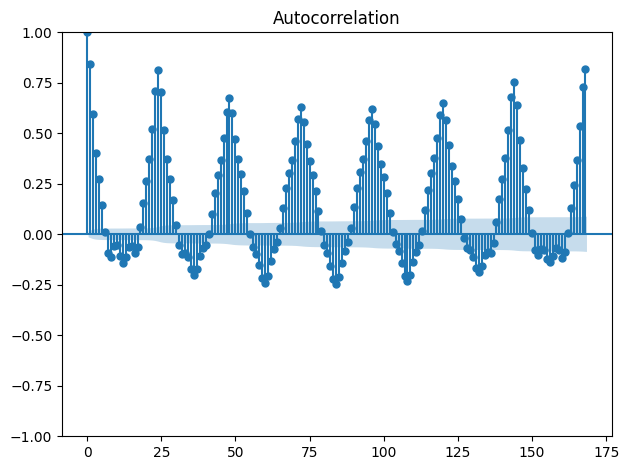

In [13]:
# Lags and rolling averages of the target (avoid leakage!)
# Create target lags/rolling features (using absolute values to maintain interpretable scale)
# Avoids leakage because we use shift (past data)

# First, let's understand the data autocorrelation

# ACF (Autocorrelation) → shows how far back the series has memory (direct + indirect lag effects)
# PACF (Partial Autocorrelation) → shows which lags really matter (direct effect only)
# Practical use:
# - ACF → helps define windows for rolling features
# - PACF → helps choose which lags to include as features

# Plot autocorrelation graph
plot_acf(y, lags=24 * 7) # to define rolling average windows
plt.tight_layout()
plt.savefig(r"images\autocorrelation.png")
plt.show()

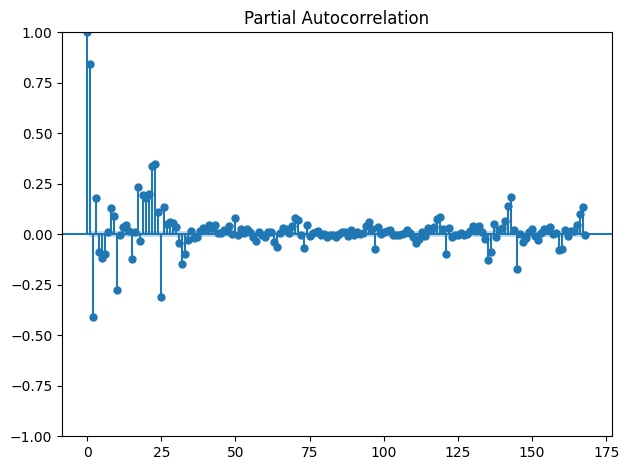

In [14]:
# Plot partial autocorrelation graph
plot_pacf(y, lags=24 * 7) # to define lag windows
plt.tight_layout()
plt.savefig(r"images\partial_autocorrelation.png")
plt.show()

In [15]:
# Define temporal window analyzed (up to 7 days back)
n_lags = 24 * 7

# Calculate temporal autocorrelations
partial_autocorrelation = pacf(y_fe, nlags=n_lags)
autocorrelation = acf(y_fe, nlags=n_lags)

# Create a dataframe with absolute autocorrelation values
autocorrelation_df = pd.DataFrame(
    {
        "partial_autocorrelation_abs": np.abs(partial_autocorrelation),
        "autocorrelation_abs": np.abs(autocorrelation),
    },
    index=range(n_lags + 1),
).iloc[1:]

# Display data
autocorrelation_df

,partial_autocorrelation_abs,autocorrelation_abs
1,0.843823,0.843774
2,0.409420,0.594070
3,0.180623,0.404356
4,0.086889,0.272212
5,0.119259,0.145557
...,...,...
164,0.019692,0.242870
165,0.048809,0.366001
166,0.106572,0.534261
167,0.143594,0.729902


In [16]:
# We'll choose the 2 best lags and windows based on the highest partial autocorrelations
# We'll only look at lags >= 24 to ensure using past information
# with a minimum horizon of 24h (values from 1 day back)
chosen_lags = autocorrelation_df.loc[24:, "partial_autocorrelation_abs"].sort_values(
    ascending=False
)
print(
    f"Best lags (used for lagged features) based on partial autocorrelation: {chosen_lags.index[0:2]}"
)

# We'll choose the 2 best rolling windows based on the highest autocorrelations  
# We'll only look at lags >= 48 to ensure using past information
# with a minimum horizon of 48h (values from 2 days back)
chosen_windows = autocorrelation_df.loc[48:, "autocorrelation_abs"].sort_values(
    ascending=False
)
print(
    f"Best windows (used for rolling features) based on autocorrelation: {chosen_windows.index[0:5]}"
)

Best lags (used for lagged features) based on partial autocorrelation: Index([25, 143], dtype='int64')
Best windows (used for rolling features) based on autocorrelation: Index([168, 144, 167, 143, 48], dtype='int64')


In [17]:
# Lagged features
df.head(3)

,season,year,month,hour,holiday,weekday,workingday,weather,temp,feel_temp,humidity,windspeed,count
0,spring,0,1,0,False,6,False,clear,9.84,14.395,0.81,0.0,16
1,spring,0,1,1,False,6,False,clear,9.02,13.635,0.80,0.0,40
2,spring,0,1,2,False,6,False,clear,9.02,13.635,0.80,0.0,32


In [18]:
lags = (25, 143)
windows = (48, 168)

past_related_features = ["temp", "feel_temp", "humidity", "windspeed"]
# Lags
for lag in lags:
    for column in past_related_features:
        X_fe[f"{column}_lag_{lag}h"] = X_fe[column].shift(lag)
    X_fe[f"count_lag_{lag}h"] = y_fe.shift(lag)

# Rolling means (moving windows) -> avoid leakage (!!!) -> Get value 1 hour before
for window in windows:
    for column in past_related_features:
        X_fe[f"{column}_roll_mean_{window}h"] = X_fe[column].shift(24).rolling(window - 24).mean()
        X_fe[f"{column}_roll_std_{window}h"] = X_fe[column].shift(24).rolling(window - 24).std()
    X_fe[f"count_roll_mean_{window}h"] = y_fe.shift(24).rolling(window - 24).mean()
    X_fe[f"count_roll_std_{window}h"] = y_fe.shift(24).rolling(window - 24).std()

X_fe.drop(columns=past_related_features + ["weather"], inplace=True)

# After creation, remove initial rows with NaN
valid = X_fe.dropna().index

# Update dataframes X (features) and y (target)
X_fe = X_fe.loc[valid]
y_fe = y_fe.loc[valid]

In [19]:
X_fe

,season,holiday,workingday,hour_sin,hour_cos,weekday_sin,weekday_cos,month_sin,month_cos,temp_lag_25h,...,temp_roll_mean_168h,temp_roll_std_168h,feel_temp_roll_mean_168h,feel_temp_roll_std_168h,humidity_roll_mean_168h,humidity_roll_std_168h,windspeed_roll_mean_168h,windspeed_roll_std_168h,count_roll_mean_168h,count_roll_std_168h
167,spring,False,False,1.000000,6.123234e-17,-0.781831,0.62349,5.000000e-01,0.866025,9.02,...,10.443611,3.758320,13.152465,4.347737,0.586597,0.177126,12.028128,7.556756,0.056636,0.051720
168,spring,False,False,0.965926,-2.588190e-01,-0.781831,0.62349,5.000000e-01,0.866025,8.20,...,10.432222,3.762645,13.126146,4.351633,0.585764,0.176348,12.090615,7.493538,0.057119,0.051667
169,spring,False,False,0.866025,-5.000000e-01,-0.781831,0.62349,5.000000e-01,0.866025,8.20,...,10.426528,3.765416,13.099861,4.359961,0.583750,0.175539,12.208656,7.435403,0.058328,0.053295
170,spring,False,False,0.707107,-7.071068e-01,-0.781831,0.62349,5.000000e-01,0.866025,8.20,...,10.420833,3.768177,13.068299,4.372493,0.581458,0.174848,12.347542,7.392424,0.059053,0.053653
171,spring,False,False,0.500000,-8.660254e-01,-0.781831,0.62349,5.000000e-01,0.866025,8.20,...,10.415139,3.769680,13.036736,4.379248,0.578819,0.175154,12.500339,7.362756,0.059408,0.053518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,spring,False,True,-0.965926,2.588190e-01,0.781831,0.62349,-2.449294e-16,1.000000,9.84,...,10.625833,1.463892,12.331493,1.969584,0.685903,0.163598,16.035008,10.185871,0.068819,0.070051
17375,spring,False,True,-0.866025,5.000000e-01,0.781831,0.62349,-2.449294e-16,1.000000,13.94,...,10.620139,1.468558,12.315729,1.980343,0.682708,0.163289,16.125318,10.180694,0.069203,0.069924
17376,spring,False,True,-0.707107,7.071068e-01,0.781831,0.62349,-2.449294e-16,1.000000,9.02,...,10.608750,1.480957,12.305208,1.985408,0.679792,0.162590,16.139230,10.172251,0.069373,0.069841
17377,spring,False,True,-0.500000,8.660254e-01,0.781831,0.62349,-2.449294e-16,1.000000,8.20,...,10.597361,1.493166,12.284167,1.995305,0.677153,0.161582,16.187805,10.140161,0.069473,0.069784


In [ ]:
# Saving the preprocessed data
df_preprocessed = pd.concat([X_fe, y_fe], axis=1)

# Saving the preprocessed dataframe ina CSV file
df_preprocessed.to_csv("data/preprocessed_data.csv", index=False)